# Data Visualization Deep Dive

If you don't have pandas, matplotlib, or numpy installed, remove the # below and run the cell.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy 

In [24]:
import pandas as pd
from matplotlib import colormaps
import matplotlib.pyplot as plt
import numpy as np

In [25]:
df = pd.read_csv("building_inventory.csv", na_values={'Square Footage': 0, 
                                                    'Year Constructed':0,
                                                    'Year Acquired':0}) 

In [26]:
df.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided


In [27]:
df.columns

Index(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County',
       'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name',
       'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired',
       'Year Constructed', 'Square Footage', 'Total Floors',
       'Floors Above Grade', 'Floors Below Grade', 'Usage Description',
       'Usage Description 2', 'Usage Description 3'],
      dtype='object')

### scatter plot

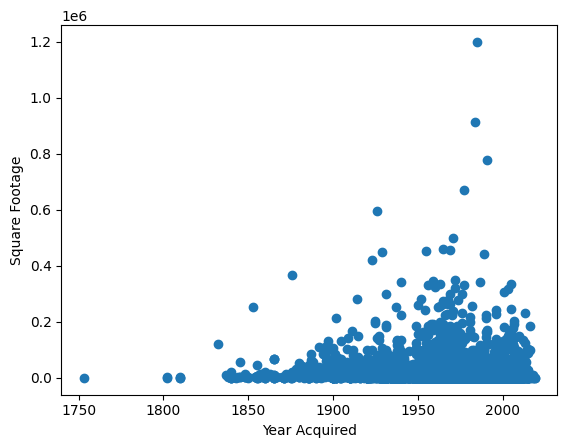

In [28]:
plt.scatter(x=df["Year Acquired"],y=df["Square Footage"])
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.show()

### log scale

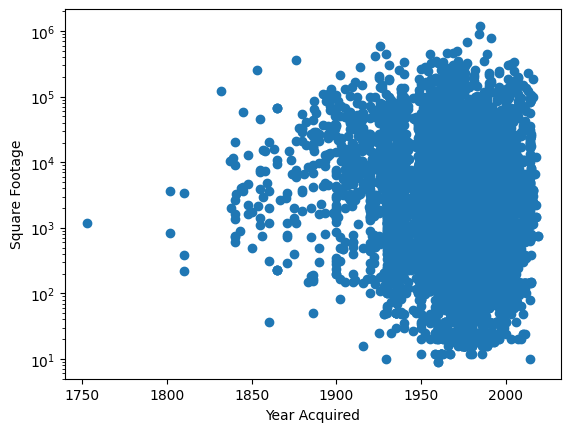

In [29]:
plt.scatter(x=df["Year Acquired"],y=df["Square Footage"])
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.yscale('log')
plt.show()

### square root scale

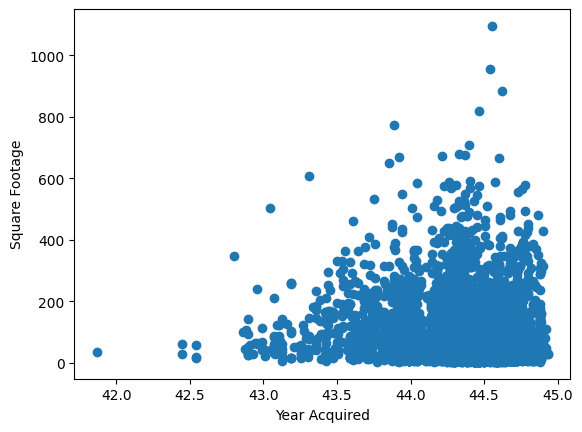

In [30]:
plt.scatter(x=np.sqrt(df["Year Acquired"]),y=np.sqrt(df["Square Footage"]))
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.show()

### bar chart

In [31]:
top_cities = df["City"].value_counts()[:5]
top_cities

City
Springfield    413
Carbondale     258
Grafton        231
Chicago        229
Urbana         204
Name: count, dtype: int64

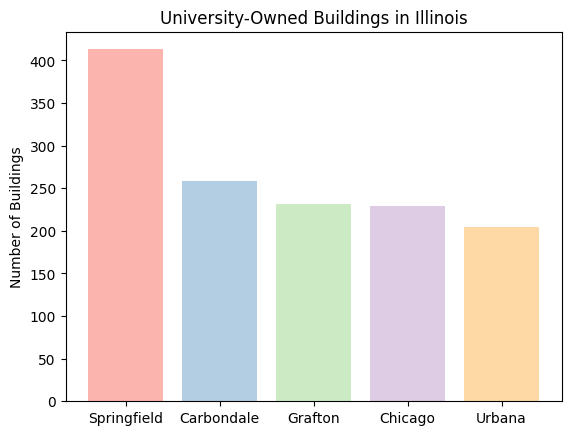

In [32]:
plt.bar(top_cities.index, top_cities.values,color=colormaps['Pastel1'].colors)
plt.ylabel("Number of Buildings")
plt.title("University-Owned Buildings in Illinois")
plt.show()

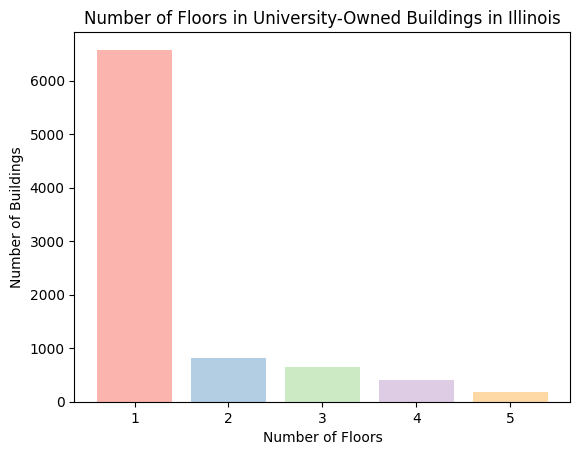

In [ ]:
most_floors = df["Total Floors"].value_counts()[:5]
plt.bar(most_floors.index, most_floors.values,color=colormaps['Pastel1'].colors)
plt.xlabel("Number of Floors")
plt.ylabel("Number of Buildings")
plt.title("Number of Floors in University-Owned Buildings in Illinois")
plt.show()

### correlation heatmap

In [33]:
correlation = df.corr(numeric_only=True) # numeric only makes it only display numerical data correlations
correlation

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
Zip code,1.000000,0.218866,0.598157,0.600344,0.069296,0.062193,-0.057570,-0.089551,-0.082180,-0.077634
Congress Dist,0.218866,1.000000,0.346628,0.348020,0.067275,0.046652,-0.122240,-0.112438,-0.102596,-0.098043
Rep Dist,0.598157,0.346628,1.000000,0.999696,0.079117,0.074628,-0.115834,-0.140791,-0.126999,-0.137211
Senate Dist,0.600344,0.348020,0.999696,1.000000,0.079571,0.075060,-0.115338,-0.140414,-0.126558,-0.137039
Year Acquired,0.069296,0.067275,0.079117,0.079571,1.000000,0.912292,-0.077190,-0.281248,-0.251619,-0.332969
Year Constructed,0.062193,0.046652,0.074628,0.075060,0.912292,1.000000,-0.075795,-0.299877,-0.270222,-0.349383
Square Footage,-0.057570,-0.122240,-0.115834,-0.115338,-0.077190,-0.075795,1.000000,0.613257,0.617292,0.368142
Total Floors,-0.089551,-0.112438,-0.140791,-0.140414,-0.281248,-0.299877,0.613257,1.000000,0.967976,0.744792
Floors Above Grade,-0.082180,-0.102596,-0.126999,-0.126558,-0.251619,-0.270222,0.617292,0.967976,1.000000,0.591651
Floors Below Grade,-0.077634,-0.098043,-0.137211,-0.137039,-0.332969,-0.349383,0.368142,0.744792,0.591651,1.000000


In [34]:
correlation.shape

(10, 10)

In [35]:
correlation.columns.values # shows numerical variables

array(['Zip code', 'Congress Dist', 'Rep Dist', 'Senate Dist',
       'Year Acquired', 'Year Constructed', 'Square Footage',
       'Total Floors', 'Floors Above Grade', 'Floors Below Grade'],
      dtype=object)

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of labels (10).

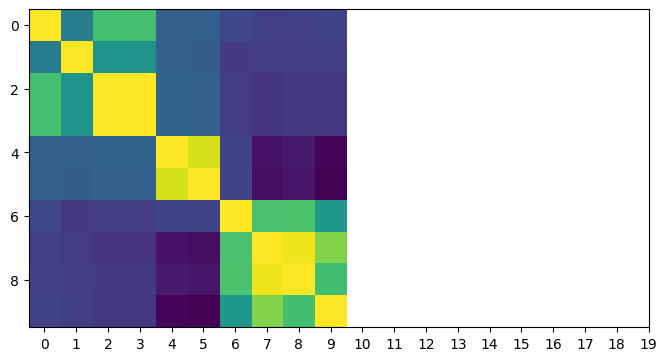

In [36]:
plt.figure(figsize=(8, 8))
plt.imshow(correlation)
plt.xticks(range(20),labels=correlation.columns.values,rotation=90)
plt.yticks(range(10), labels=correlation.columns.values)
plt.colorbar()

...
plt.title("Correlation of Numeric Variables")
plt.show()

In [ ]:
plt.scatter(x=np.sqrt(df["Year Acquired"]),y=np.sqrt(df["Square Footage"]))
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.show()

### line plot

In [23]:
weather = pd.read_parquet("weather-train.parquet")
weather.head()

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [ ]:
august_2016 = weather[(weather.year == 2016) & (weather.month == 8)]

In [ ]:
...
plt.xticks([])
plt.yticks(range(5, 30, 5))
plt.title("Lowest Temperature in Urbana, IL (Oct. 2016)")
...
plt.show()

### polar coordinates

In [ ]:
r = august_2016['temperature_2m_min'].values 
r

In [ ]:
theta = np.linspace(0, 2*np.pi, num=31) 
theta

In [ ]:
fig, ax = ...
ax.set_title("Lowest Temperature in Urbana, IL (Oct. 2016)")
ax.plot(theta, r) 
lines, lables = ...
ax.set_xticklabels([])
plt.show()

### temperature heatmap

In [ ]:
year_2016 = weather[weather.year == 2016]
year_2016

In [ ]:
heatmap = year_2016.pivot(...)
heatmap

In [ ]:
plt.figure(figsize=(12, 8))
...
plt.yticks(range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'])
...
plt.title("Lowest Daily Temperature in Urbana, IL in 2016")
plt.show()